# Некоторые виды задач кластеризации для изображений

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

## Рассморим датасет рукописных цирф MNIST

In [2]:
from sklearn import datasets

# загружаем датасет
X, y = datasets.load_digits(return_X_y=True) 
print("Экземпляров: {}\nРазмер изображения: {}x{}".format(X.shape[0], np.sqrt(X.shape[1]), np.sqrt(X.shape[1])))

Экземпляров: 1797
Размер изображения: 8.0x8.0


Выведем первые 10 экземпляров данных

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


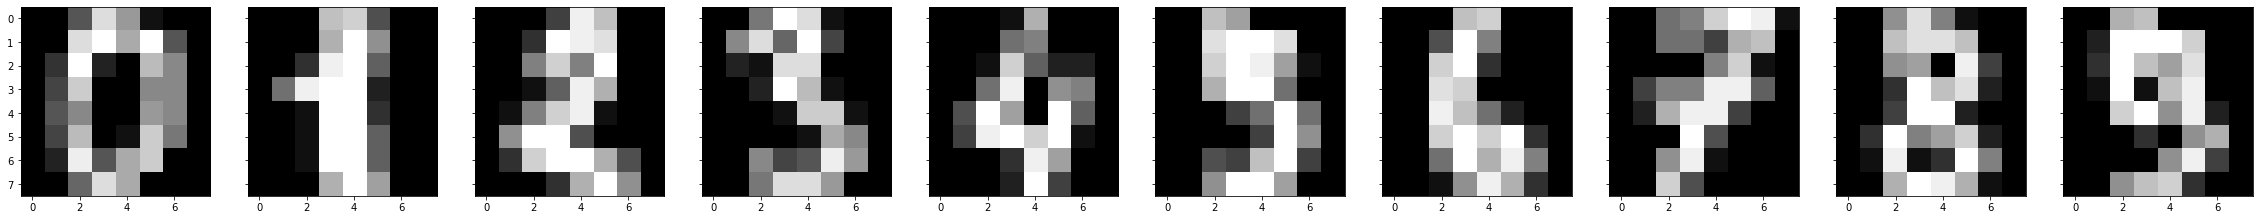

In [3]:
count = 10
testX = X[:count]
print(testX[0])
testX[0,:].reshape([8,8])
f, axes = plt.subplots(1, count, sharey=True, figsize=(40,6))
for i in range(count):
    axes[i].imshow(testX[i,:].reshape([8,8]), cmap='gray')


Натренируем KMeans на наборе X для 10 кластеров

In [4]:
from sklearn.cluster import KMeans
clusters_mnist = KMeans(n_clusters=10).fit(X)

labels_mnist = clusters_mnist.labels_

Проверим. Выведем 10 точек из какого нибудь кластера и посмотрим, что они соотвествуют одной цифре.

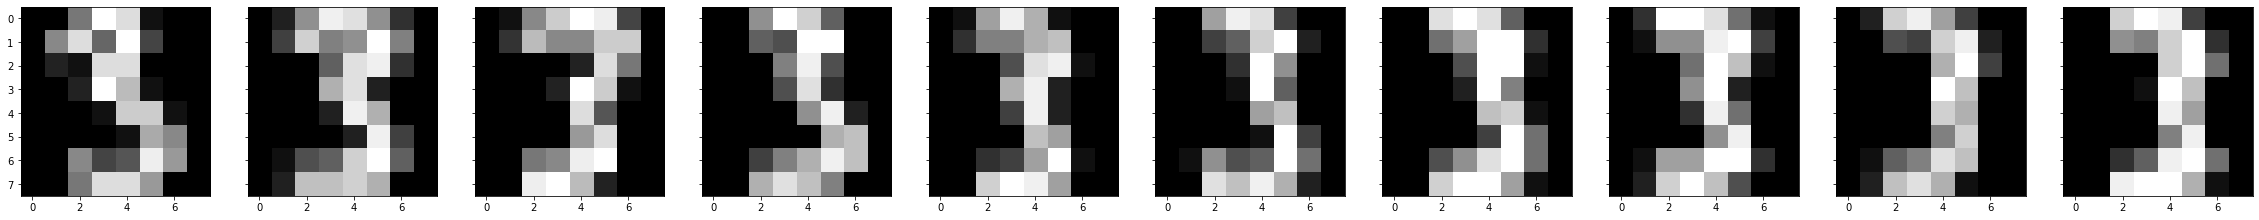

In [5]:
number = 3 # Номер кластера
count = 10 # Кол-во примеров

# все изображения, у которых метка 4
testX = X[y == number]

f, axes = plt.subplots(1, count, sharey=True, figsize=(40,6))
for i in range(count):
    axes[i].imshow(testX[i,:].reshape([8,8]), cmap='gray')

Для первых 10 объектов выведем картинку, метку от KMeans и класс у 

2 : 0;    1 : 1;    1 : 2;    6 : 3;    7 : 4;    0 : 5;    8 : 6;    5 : 7;    1 : 8;    0 : 9;    

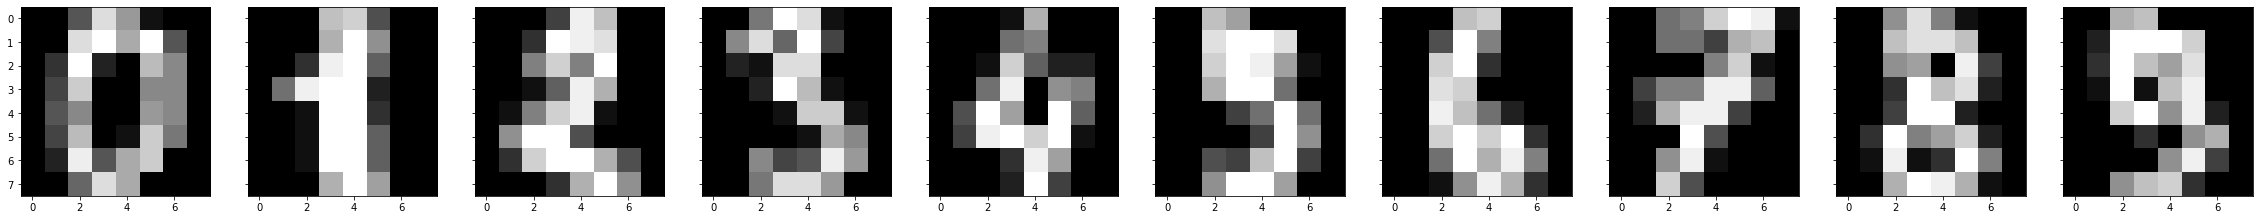

In [6]:
count = 10 # Кол-во примеров

f, axes = plt.subplots(1, count, sharey=True, figsize=(40,6))
for i in range(count):
    print(labels_mnist[i], ':', y[i], end = ';    ')
    axes[i].imshow(X[i,:].reshape([8,8]), cmap='gray')

Не всегда результат кластеризации соответсвует истине

### Задание

Проанализируйте качество кластеризации с помощью внутренних и внешних метрик из библиотеки `skilearn`.

Например, внешние (принимают значения от 0 до 1, чем ближе к 1, тем лучше):

- `adjusted_mutual_info_score` (AMI - Скорректированная взаимная информация), 

- `normalized_mutual_info_score` (NMI - Нормализованная взаимная информация), 

- `homogeneity_completeness_v_measure` (одновременно вычисляет однородность, полноту, V-меру);

внутренние:

- `silhouette_score` (более высокий показатель Коэффициента Силуэта относится к модели с более четко определенными кластерами)

- `alinski_harabaz_score`(более высокий показатель Калински-Харабаша относится к модели с более четко определенными кластерами)

- `davies_bouldin_score`(более низкий индекс Дэвиса-Булдина относится к модели с лучшим разделением между кластерами)


In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics  import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

siluete = []
cal_har = []
dav_boul = []

(siluete.append(silhouette_score(X, labels_mnist)))
(cal_har.append(calinski_harabasz_score(X, labels_mnist)))
(dav_boul.append(davies_bouldin_score(X, labels_mnist)))
print('силуэт ', siluete[0])
print('Калински-Харабаша ',cal_har[0])
print('Дэвиса-Булдина ',dav_boul[0])

силуэт  0.1826553693746262
Калински-Харабаша  169.3455309349637
Дэвиса-Булдина  1.9220071128531964


In [8]:
from sklearn import metrics

print (metrics.adjusted_rand_score(y, labels_mnist))
print (metrics.normalized_mutual_info_score(y, labels_mnist))
print (metrics.homogeneity_completeness_v_measure(y, labels_mnist))
print (metrics.fowlkes_mallows_score(y, labels_mnist))

# 

0.668969445171505
0.7456245485926999
(0.7409057297513865, 0.7504038609063289, 0.7456245485927)
0.7030173657230768


## Центры кластеров фотографий

Можно найти центры кластеров по фотографиям людей....

In [9]:
# загрузим датасет с фотографиями знаменитостей
from sklearn import datasets
lfw_people = datasets.fetch_lfw_people(min_faces_per_person=50, resize=0.4)

#min_faces_per_person=50 - только фотографии людей, у которых хотя бы 50 фотографий.

Посмотрим на содержимое набора данных

Ariel Sharon: 77 photos.
Colin Powell: 236 photos.
Donald Rumsfeld: 121 photos.
George W Bush: 530 photos.
Gerhard Schroeder: 109 photos.
Hugo Chavez: 71 photos.
Jacques Chirac: 52 photos.
Jean Chretien: 55 photos.
John Ashcroft: 53 photos.
Junichiro Koizumi: 60 photos.
Serena Williams: 52 photos.
Tony Blair: 144 photos.


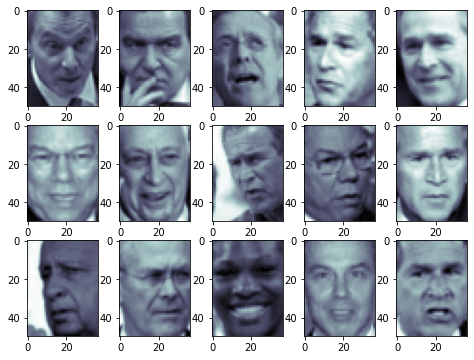

In [10]:
fig = plt.figure(figsize=(8, 6))

for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1)
    ax.imshow(lfw_people.images[i], cmap='bone')

for i, name in enumerate(lfw_people.target_names):
    print("{}: {} photos.".format(name, (lfw_people.target == i).sum()))

### Задание

Натренируйте kMeans и нарисуйте центры кластеров как картинки выше.

In [11]:
lfw_people.images[0].shape

(50, 37)

In [12]:
kres = KMeans(n_clusters=12).fit(list(map(lambda x: np.reshape(x, 1850), lfw_people.images)))
res_cen=kres.cluster_centers_

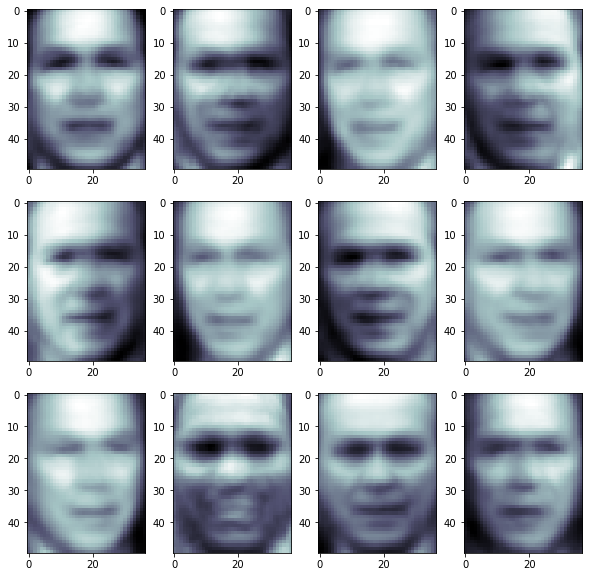

In [13]:
  
tempCenter = np.array(list(map(lambda x: np.reshape(x, (50,37)), res_cen)))
f = plt.figure(figsize=(10, 10))

for i in range(12):
    ax = f.add_subplot(3, 4, i + 1)
    ax.imshow(tempCenter[i], cmap='bone')

## Птичка

С помощью алгоритмов кластеризации можно уменьшить число цветов в изображении. В данном случае будут кластеризоваться похожие пиксели. Такой подход позволяет перейти к суперпиксельному представлению изображений, которое является более компактным и используется в задачах компьютерного зрения.

Загрузим картинку bird.jpg с помощью scikit-image и выведем ее с помощью matplotlib.

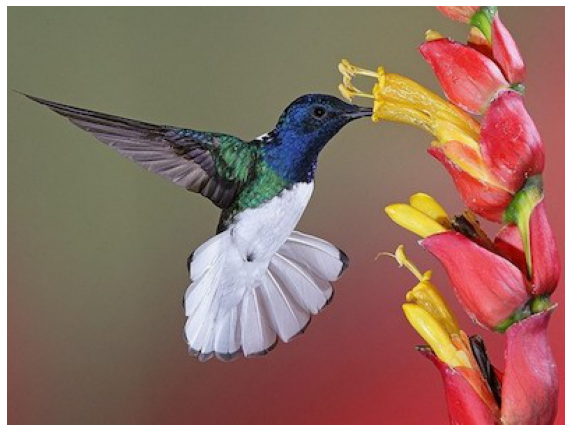

In [14]:
%matplotlib inline
from skimage.io import imread
from matplotlib import pyplot as plt
import numpy as np

img = imread("bird.jpg")
plt.figure(figsize=(10,15))
plt.axis('off')
plt.imshow(img)

In [15]:
img

array([[[111, 117,  91],
        [111, 117,  91],
        [111, 117,  91],
        ...,
        [143,  99,  90],
        [143,  99,  90],
        [145,  98,  90]],

       [[111, 117,  91],
        [111, 117,  91],
        [112, 118,  92],
        ...,
        [143,  99,  90],
        [145,  98,  90],
        [145,  98,  90]],

       [[112, 118,  92],
        [112, 118,  92],
        [112, 118,  92],
        ...,
        [143,  99,  90],
        [144,  97,  89],
        [144,  97,  89]],

       ...,

       [[115,  70,  65],
        [115,  70,  65],
        [114,  71,  65],
        ...,
        [210,  54,  68],
        [203,  48,  64],
        [208,  53,  69]],

       [[115,  70,  65],
        [115,  70,  65],
        [114,  71,  65],
        ...,
        [207,  51,  65],
        [204,  49,  65],
        [206,  54,  69]],

       [[115,  70,  65],
        [114,  69,  64],
        [114,  71,  65],
        ...,
        [207,  51,  65],
        [205,  50,  66],
        [203,  50,  68]]

Если вы посмотрите на содержимое numpy-массива `img`, в котором хранится изображение, то увидите, что там будут числа от 0 до 255. Нам лучше перейти к числам от 0 до 1.

Преобразуем нашу матрицу.

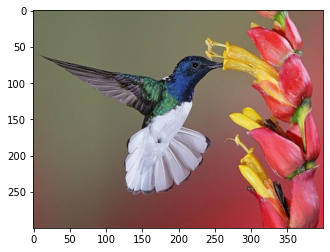

In [16]:
from skimage import img_as_float
img_float = img_as_float(img)
plt.imshow(img_float)

In [17]:
img_float

array([[[0.43529412, 0.45882353, 0.35686275],
        [0.43529412, 0.45882353, 0.35686275],
        [0.43529412, 0.45882353, 0.35686275],
        ...,
        [0.56078431, 0.38823529, 0.35294118],
        [0.56078431, 0.38823529, 0.35294118],
        [0.56862745, 0.38431373, 0.35294118]],

       [[0.43529412, 0.45882353, 0.35686275],
        [0.43529412, 0.45882353, 0.35686275],
        [0.43921569, 0.4627451 , 0.36078431],
        ...,
        [0.56078431, 0.38823529, 0.35294118],
        [0.56862745, 0.38431373, 0.35294118],
        [0.56862745, 0.38431373, 0.35294118]],

       [[0.43921569, 0.4627451 , 0.36078431],
        [0.43921569, 0.4627451 , 0.36078431],
        [0.43921569, 0.4627451 , 0.36078431],
        ...,
        [0.56078431, 0.38823529, 0.35294118],
        [0.56470588, 0.38039216, 0.34901961],
        [0.56470588, 0.38039216, 0.34901961]],

       ...,

       [[0.45098039, 0.2745098 , 0.25490196],
        [0.45098039, 0.2745098 , 0.25490196],
        [0.44705882, 0

Мы получили матрицу размера (300, 400, 3). Нам это не подходит. Чтобы запустить kMeans нам нужно иметь много-много объектов и 3 признака - значение яркости пикселя в каналах Red, Green и Blue.

Преобразуем матрицу так, чтобы получилась матрица размера (120000, 3).


In [18]:
points = np.reshape(img_float, (120000, 3))
points

array([[0.43529412, 0.45882353, 0.35686275],
       [0.43529412, 0.45882353, 0.35686275],
       [0.43529412, 0.45882353, 0.35686275],
       ...,
       [0.81176471, 0.2       , 0.25490196],
       [0.80392157, 0.19607843, 0.25882353],
       [0.79607843, 0.19607843, 0.26666667]])

Хотим преобразовать картинку так, чтобы оба состояла из точек 8 цветов. Для этого обучим KMeans для 8 кластеров.

In [19]:
from sklearn.cluster import KMeans
Clf=KMeans(n_clusters=8)
kmeans = Clf.fit(points)

In [20]:
centers = kmeans.cluster_centers_


У нас есть значения цвета для каждого центра кластера. Каждый пиксель в результате обучения KMeans теперь имеет свою метку кластера. Значит мы можем заменить все пиксели на соответсвующие им центры класетров.

### Задание###
Проведите это преобразование и выведите 8-цветное изображение.



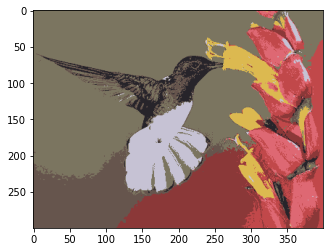

In [23]:
img = Clf.predict(points).reshape(300, 400)
result = np.empty((300, 400, 3))
labels = Clf.labels_
centers = Clf.cluster_centers_
for label in labels:
    result[img == label] = centers[label]
plt.imshow(result)